In [3]:
import numpy as np 
import pandas as pd 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv("newhour.csv")
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,Ahmedabad,3/5/2015 19:00,NaN,NaN,NaN,21.00,NaN,NaN,NaN,103.00,160.00,NaN,NaN,NaN,331.0
1531,Ahmedabad,3/5/2015 20:00,NaN,NaN,NaN,32.00,NaN,NaN,NaN,99.00,189.00,NaN,NaN,NaN,334.0
1532,Ahmedabad,3/5/2015 21:00,NaN,NaN,NaN,27.00,NaN,NaN,NaN,124.00,185.00,NaN,NaN,NaN,337.0
1533,Ahmedabad,3/5/2015 22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.0


In [5]:
data['Datetime']=pd.to_datetime(data['Datetime'])

<AxesSubplot:>

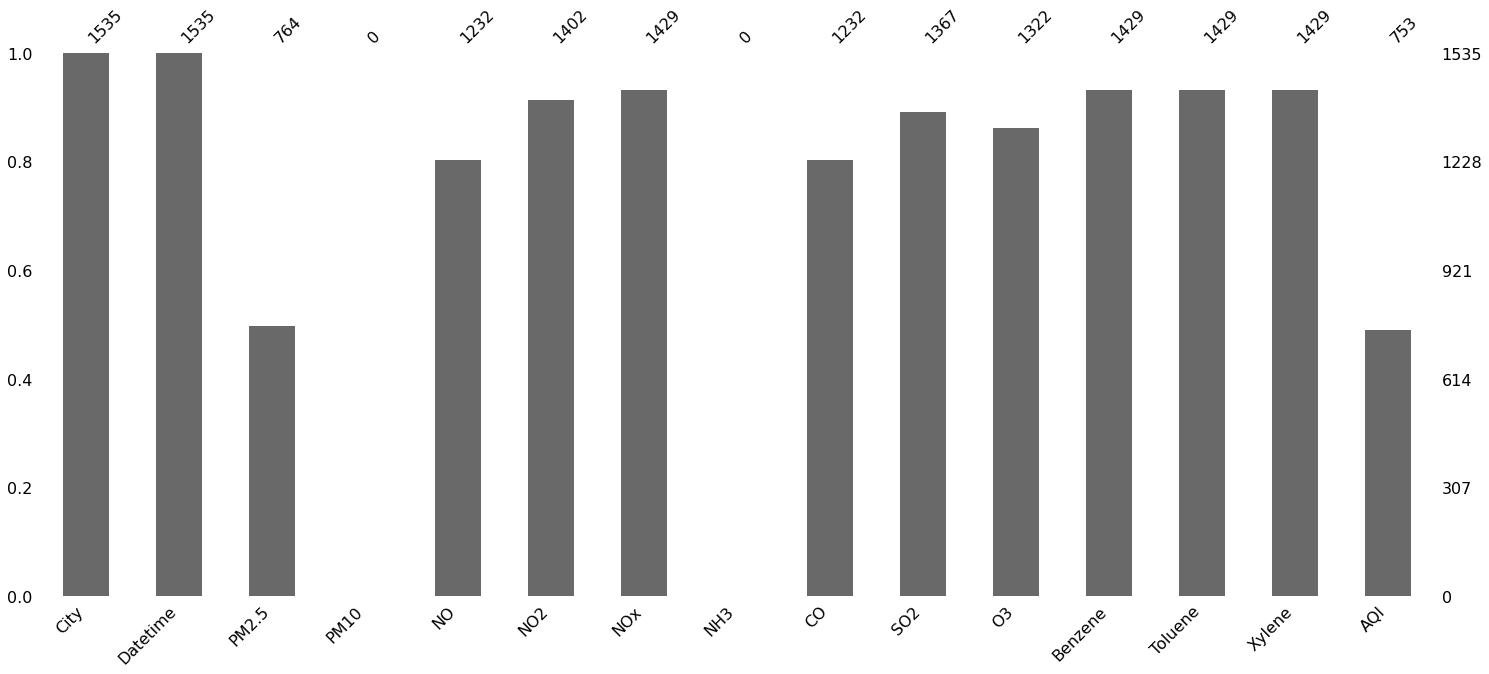

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

missing=pd.DataFrame(data.isna().sum()/len(data))
missing.columns=['Proportion']

msno.bar(data)

In [7]:
data.fillna(0,inplace=True)

#extracting year and month for each record
data['date'] = pd.DatetimeIndex(data['Datetime']).date
data['time'] = pd.DatetimeIndex(data['Datetime']).time

#clubbing all particulate matter
data['PM']=data['PM2.5'] + data['PM10']

#clubbing nitrogen oxides
data['Nitric']=data['NO'] + data['NO2']+ data['NOx']

#clubbing Benzene, toluene and Xylene together
data['BTX']=data['Benzene'] + data['Toluene']+ data['Xylene']

#grouping pollutant levels in every city by year and month
datagrp=data.groupby(['City','date','time'])[['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']].mean()

datagrp=datagrp.reset_index(['City','date','time'])
datagrp.head()

,City,date,time,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
0,Ahmedabad,2015-01-01,01:00:00,0.0,77.38,1.00,0.0,0.00,122.07,0.0,0.0
1,Ahmedabad,2015-01-01,02:00:00,0.0,47.50,0.02,0.0,0.00,85.90,0.0,0.0
2,Ahmedabad,2015-01-01,03:00:00,0.0,30.48,0.08,0.0,0.00,52.83,0.0,0.0
3,Ahmedabad,2015-01-01,04:00:00,0.0,25.95,0.30,0.0,153.58,39.53,0.0,0.0
4,Ahmedabad,2015-01-01,05:00:00,0.0,22.87,0.12,0.0,0.00,32.63,0.0,0.0


In [8]:
for i in datagrp:
    if i=="AQI":
        for j in datagrp["AQI"]:
            if j>0 and j<50:
                print("Good")
            elif j>51 and j<100:
                print("Satisfactory")
            elif j>101 and j<200:
                print("moderately polluted")
            elif j>201 and j<300:
                print("poor")
            elif j>301 and j<400:
                print("very poor")
            else:
                print("severe")

severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe
severe

In [9]:
dftest = adfuller(data['AQI'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['statiscal result','p value','no of lags','observation count'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
dfoutput

statiscal result          -3.089505
p value                    0.027340
no of lags                24.000000
observation count       1510.000000
critical value (1%)       -3.434688
critical value (5%)       -2.863456
critical value (10%)      -2.567790
dtype: float64

NameError: name 'auto_arima' is not defined

In [13]:
!pip install pmdarima;
from pmdarima import auto_arima;  

In [14]:
auto_arima(y=data['AQI'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=\
          True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1535
Model:             SARIMAX(1, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -8890.556
Date:                                 Thu, 25 Nov 2021   AIC                          17793.112
Time:                                         11:26:35   BIC                          17825.126
Sample:                                              0   HQIC                         17805.025
                                                - 1535                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2511      0.014     18.378      0.000       0.224       0.278
ar.S.L12      -0.1408      0.055     -2.577      0.010      -0.248      -0.034
ar.S.L24       0.6493      0.055     11.771      0.000       0.541       0.757
ma.S.L12       0.0898      0.064      1.410      0.158      -0.035       0.215
ma.S.L24      -0.4664      0.057     -8.219      0.000      -0.578      -0.355
sigma2      6321.9309     58.471    108.121      0.000    6207.330    6436.531
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             99746.41
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                            -1.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
trainset=data['AQI'][:'2018-12']
testset=data['AQI'][:'2019-12']
model=SARIMAX(trainset,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
final=model.fit()
final.summary()

TypeError: cannot do slice indexing on RangeIndex with these indexers [2018-12] of type str

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
forecastdata= results.get_forecast(steps=12, dynamic=True)
conf_=forecastdata.conf_int()
lower_limits = confidence_intervals.loc[:,'lower India_AQI']
upper_limits = confidence_intervals.loc[:,'upper India_AQI']
forecastdata.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

#plotting the actual value from test data
test_data.plot(legend=True, ax=ax)